In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime
from scipy import stats
import os

print(os.listdir("Resources/names"))

['yob2000.txt', 'yob2014.txt', 'yob2015.txt', 'yob2001.txt', 'yob2017.txt', 'yob2003.txt', 'yob2002.txt', 'yob2016.txt', 'yob2012.txt', 'yob2006.txt', 'yob2007.txt', 'yob2013.txt', 'yob2005.txt', 'yob2011.txt', 'yob2010.txt', 'yob2004.txt', 'yob1973.txt', 'yob1998.txt', 'yob1999.txt', 'yob1972.txt', 'yob1970.txt', 'yob1971.txt', 'yob1975.txt', 'yob1974.txt', 'yob1976.txt', 'yob1989.txt', 'yob1988.txt', 'yob1977.txt', 'yob1991.txt', 'yob1985.txt', 'yob1984.txt', 'yob1990.txt', 'yob1979.txt', 'yob1986.txt', 'yob1992.txt', 'yob1993.txt', 'yob1987.txt', 'yob1978.txt', 'yob1983.txt', 'yob1997.txt', 'yob1996.txt', 'yob1982.txt', 'yob1994.txt', 'yob1980.txt', 'yob1981.txt', 'yob1995.txt', 'yob2009.txt', '.ipynb_checkpoints', 'yob2008.txt', 'NationalReadMe.pdf']


In [11]:
year = []
for filename in os.listdir("Resources/names"):
    if 'yob20' in filename:
        namefile = pd.read_csv(f"Resources/names/{filename}",header=None)
        namefile['year'] = os.path.splitext(filename)[0][-4:]
        year.append(namefile)

#data is in series, merge all years together
df = pd.concat(year)

In [12]:
df.head()

,0,1,2,year
0,Emily,F,25953,2000
1,Hannah,F,23080,2000
2,Madison,F,19967,2000
3,Ashley,F,17997,2000
4,Sarah,F,17697,2000


In [13]:
name_df = df.rename(columns={
    0:'name',
    1:'gender',
    2:'count'
})
name_df.head()

,name,gender,count,year
0,Emily,F,25953,2000
1,Hannah,F,23080,2000
2,Madison,F,19967,2000
3,Ashley,F,17997,2000
4,Sarah,F,17697,2000


In [14]:
name_df.dtypes

name      object
gender    object
count      int64
year      object
dtype: object

In [15]:
#count of total babies born in the year
yearTotal_df = name_df.groupby('year').sum().rename(columns={'count':'yearTotal'})

In [16]:
yearTotal_df.head()

,yearTotal
year,
2000,3778079
2001,3741451
2002,3736042
2003,3799971
2004,3818361


In [17]:
#merge total babies born in year and unique names
name_df = name_df.merge(yearTotal_df,on='year')
name_df.head()

,name,gender,count,year,yearTotal
0,Emily,F,25953,2000,3778079
1,Hannah,F,23080,2000,3778079
2,Madison,F,19967,2000,3778079
3,Ashley,F,17997,2000,3778079
4,Sarah,F,17697,2000,3778079


In [18]:
#Calculate % of name
name_df['name_percent'] = 100*(name_df.loc[:,'count']/name_df.loc[:,'yearTotal'])
name_df.head()

,name,gender,count,year,yearTotal,name_percent
0,Emily,F,25953,2000,3778079,0.686936
1,Hannah,F,23080,2000,3778079,0.610892
2,Madison,F,19967,2000,3778079,0.528496
3,Ashley,F,17997,2000,3778079,0.476353
4,Sarah,F,17697,2000,3778079,0.468413


In [19]:
#Get top 5 female names in year 2011
f2011_df1 = name_df[name_df['gender']=='F'] 
f2011_df2 = f2011_df1[f2011_df1['year']=='2011'].sort_values('name_percent',ascending=False)
top5_f2011_df = f2011_df2.head()
top5_f2011_df.head()

,name,gender,count,year,yearTotal,name_percent
422137,Sophia,F,21837,2011,3651914,0.597960
422138,Isabella,F,19901,2011,3651914,0.544947
422139,Emma,F,18797,2011,3651914,0.514716
422140,Olivia,F,17321,2011,3651914,0.474299
422141,Ava,F,15496,2011,3651914,0.424325


In [20]:
#Get top 5 female names in year 2017
f2017_df1 = name_df[name_df['gender']=='F'] 
f2017_df2 = f2017_df1[f2017_df1['year']=='2017'].sort_values('name_percent',ascending=False)
top5_f2017_df = f2017_df2.head()
top5_f2017_df.head()

,name,gender,count,year,yearTotal,name_percent
126364,Emma,F,19738,2017,3546301,0.556580
126365,Olivia,F,18632,2017,3546301,0.525393
126366,Ava,F,15902,2017,3546301,0.448411
126367,Isabella,F,15100,2017,3546301,0.425796
126368,Sophia,F,14831,2017,3546301,0.418210


In [21]:
#union - top 5 is same for 2011 and 2017
result = pd.concat([top5_f2011_df,top5_f2017_df])
result

,name,gender,count,year,yearTotal,name_percent
422137,Sophia,F,21837,2011,3651914,0.597960
422138,Isabella,F,19901,2011,3651914,0.544947
422139,Emma,F,18797,2011,3651914,0.514716
422140,Olivia,F,17321,2011,3651914,0.474299
422141,Ava,F,15496,2011,3651914,0.424325
126364,Emma,F,19738,2017,3546301,0.556580
126365,Olivia,F,18632,2017,3546301,0.525393
126366,Ava,F,15902,2017,3546301,0.448411
126367,Isabella,F,15100,2017,3546301,0.425796
126368,Sophia,F,14831,2017,3546301,0.418210


In [22]:
#merge 2011 vs 2017
merge = top5_f2011_df.merge(top5_f2017_df,on='name')
merge['change_percent'] = merge['name_percent_y'] - merge['name_percent_x']
merge

,name,gender_x,count_x,year_x,yearTotal_x,name_percent_x,gender_y,count_y,year_y,yearTotal_y,name_percent_y,change_percent
0,Sophia,F,21837,2011,3651914,0.597960,F,14831,2017,3546301,0.418210,-0.179750
1,Isabella,F,19901,2011,3651914,0.544947,F,15100,2017,3546301,0.425796,-0.119151
2,Emma,F,18797,2011,3651914,0.514716,F,19738,2017,3546301,0.556580,0.041864
3,Olivia,F,17321,2011,3651914,0.474299,F,18632,2017,3546301,0.525393,0.051093
4,Ava,F,15496,2011,3651914,0.424325,F,15902,2017,3546301,0.448411,0.024085


<BarContainer object of 5 artists>

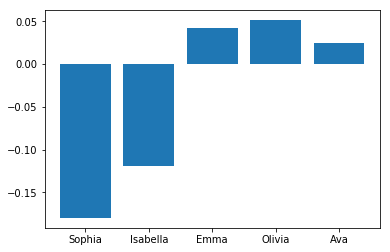

In [23]:
plt.bar(merge['name'],merge['change_percent'])